Decision Tree

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

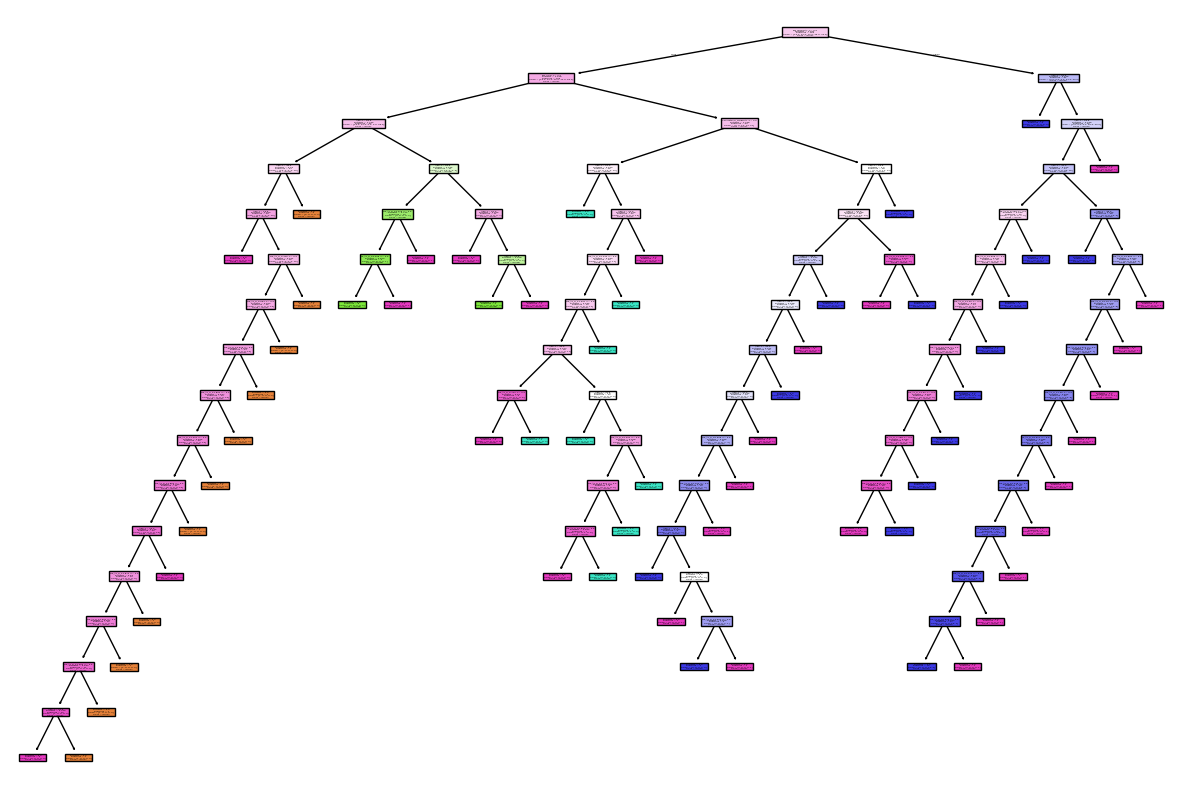

In [2]:
# 1

data = pd.read_csv(r'datasets\drug200.csv')
data.dropna(inplace=True)
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol','Na_to_K'], drop_first=True)

X = data_encoded.drop(columns=['Drug'])
y = data_encoded['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

Training Accuracy: 0.5408805031446541
Test Accuracy: 0.425


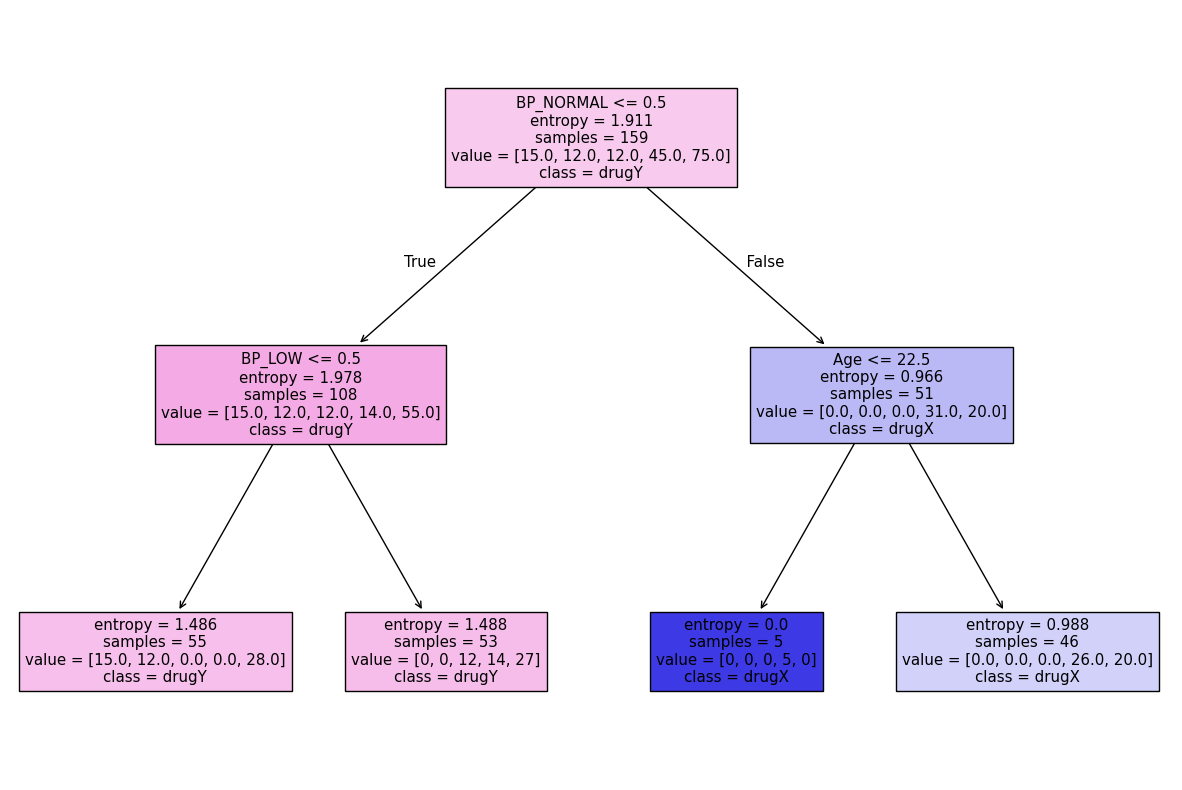

In [3]:
# 2

clf1 = DecisionTreeClassifier(max_depth=2,criterion="entropy")
clf1.fit(X_train, y_train)

y_train_pred = clf1.predict(X_train)

y_test_pred = clf1.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(15,10))
plot_tree(clf1, feature_names=X.columns, class_names=clf1.classes_, filled=True)
plt.show()


In [4]:
from sklearn.tree import DecisionTreeClassifier , _tree

class DecisionTreeClassifier(DecisionTreeClassifier):
    def __init__(self,min_purity=0.5,criterion='entropy',**args):
        super().__init__(criterion=criterion,**args)
        self.min_purity=min_purity
    def _prune(self,tree,node_id):
        if tree.children_left[node_id] == _tree.TREE_LEAF:
            return
        samples = tree.value[node_id][0]
        total_samples= samples.sum()

        if samples.sum()==0:
            return
        
        purity=samples.max()/total_samples

        if purity>=self.min_purity:
            tree.children_left[node_id]=_tree.TREE_LEAF
            tree.children_right[node_id]=_tree.TREE_LEAF
            tree.feature[node_id]=-2

    def fit(self,X,y):
        super().fit(X=X,y=y)
        for i in range(self.tree_.node_count):
            self._prune(self.tree_,i)
        return self

Training Accuracy: 0.89937106918239
Test Accuracy: 0.45


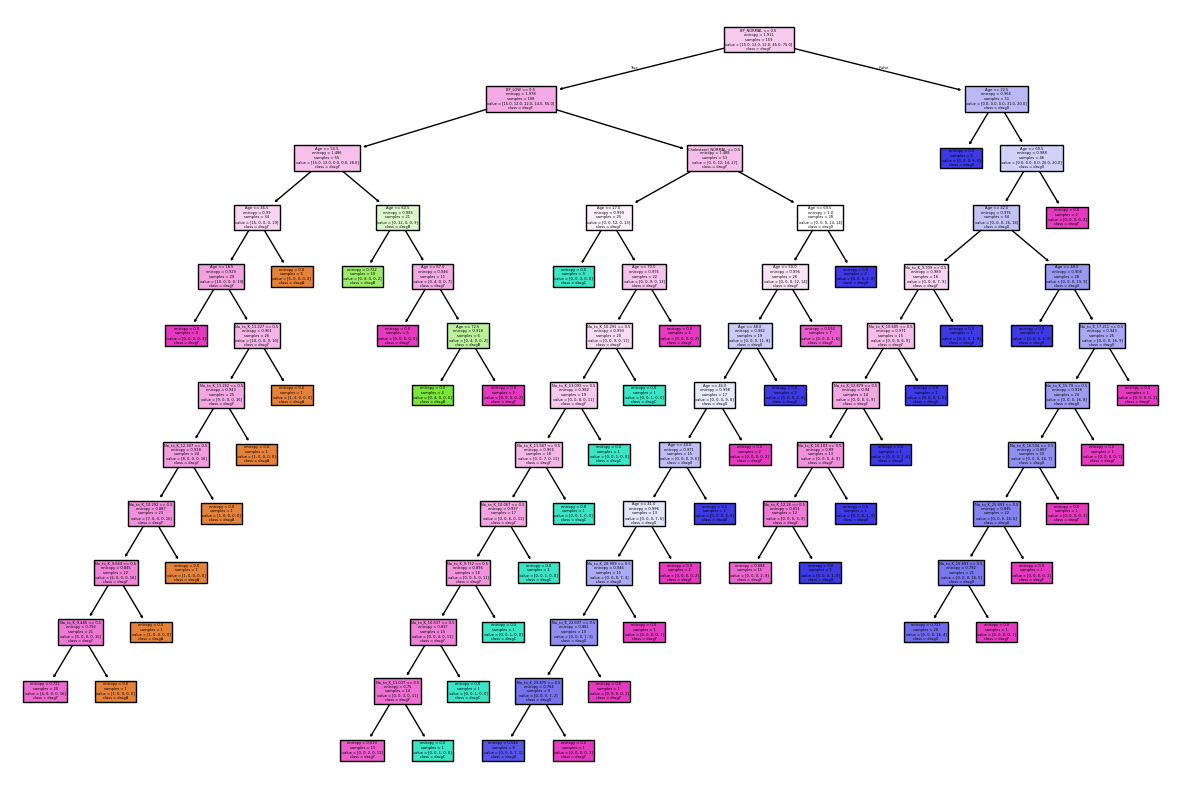

In [5]:
dt=DecisionTreeClassifier(min_purity=0.8)
dt.fit(X_train,y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True)
plt.show()


In [6]:
from sklearn.model_selection import cross_val_score
# 4

depths = [2, 3, 4, 5]

best_depth = None
best_test_accuracy = 0
best_clf = None

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print(f'Max Depth: {depth}')
    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Average Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')
    
    test_accuracy = clf.score(X_test, y_test)
    print(f'Test Accuracy: {test_accuracy:.4f}\n')
    
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_depth = depth
        best_clf = clf

print(f'Best Depth: {best_depth}')
print(f'Best Test Accuracy: {best_test_accuracy:.4f}')

Max Depth: 2
Cross-Validation Scores: [0.6875 0.5625 0.5625 0.5    0.375  0.375  0.5625 0.5625 0.625  0.6   ]
Average Cross-Validation Accuracy: 0.5413
Test Accuracy: 0.4250

Max Depth: 3
Cross-Validation Scores: [0.6875 0.5625 0.5625 0.5    0.375  0.375  0.5625 0.5625 0.625  0.6   ]
Average Cross-Validation Accuracy: 0.5413
Test Accuracy: 0.4250

Max Depth: 4
Cross-Validation Scores: [0.6875 0.5625 0.5625 0.5    0.375  0.375  0.5625 0.5625 0.625  0.6   ]
Average Cross-Validation Accuracy: 0.5413
Test Accuracy: 0.4250

Max Depth: 5
Cross-Validation Scores: [0.6875 0.5625 0.5625 0.5    0.375  0.375  0.5625 0.5625 0.625  0.6   ]
Average Cross-Validation Accuracy: 0.5413
Test Accuracy: 0.4250

Best Depth: 2
Best Test Accuracy: 0.4250
